In [1]:
from beschess.load import load_game
from beschess.analysis import engine_analysis
from itertools import islice as take
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%load_ext autoreload
%autoreload 2

In [2]:
# german11_games = filter(lambda g: g.headers['White'] == "german11", load_game.load_games_pgn(r'../data/lichess_db_standard_rated_2013-01.pgn'))
# analyzers = map(lambda g: engine_analysis(g, depth=12), german11_games)
analyzers = map(lambda g: engine_analysis(g, depth=12), load_game.load_games_pgn(r'../data/lichess_db_standard_rated_2013-01.pgn'))

In [3]:
user_dict = {"White": [], "Black": []}
for i, analyzer in enumerate(take(analyzers, 10)):
    print(i)
    user_dict["White"].append([])
    for i, move, score in analyzer:
        user_dict["White"][-1].append(score)

user_dict

0
Analyzing: BFG9k vs mamalak

Analysis complete.
1
Analyzing: Desmond_Wilson vs savinka59

Analysis complete.
2
Analyzing: Kozakmamay007 vs VanillaShamanilla

Analysis complete.
3
Analyzing: Naitero_Nagasaki vs 800

Analysis complete.
4
Analyzing: nichiren1967 vs Naitero_Nagasaki

Analysis complete.
5
Analyzing: sport vs shamirbj

Analysis complete.
6
Analyzing: tiggran vs arion_6

Analysis complete.
7
Analyzing: hostking vs troepianiz

Analysis complete.
8
Analyzing: manos68 vs jtkjtkful

Analysis complete.
9
Analyzing: adamsrj vs hamiakaz

Analysis complete.


{'White': [[33,
   46,
   47,
   38,
   93,
   53,
   89,
   67,
   176,
   133,
   137,
   71,
   140,
   44,
   54,
   -504,
   94,
   -553,
   -322,
   -288,
   -330,
   -355,
   -286,
   -254,
   1],
  [33,
   33,
   22,
   26,
   22,
   17,
   27,
   -7,
   35,
   21,
   38,
   5,
   21,
   -33,
   30,
   36,
   47,
   40,
   208,
   -61,
   -52,
   -67,
   -11,
   -111,
   52,
   -264,
   -248,
   -468,
   368,
   342,
   738,
   684,
   707,
   659,
   679],
  [33,
   46,
   39,
   44,
   43,
   17,
   30,
   -16,
   13,
   5,
   310,
   328,
   377,
   384,
   438,
   427,
   549,
   544,
   577,
   582,
   787],
  [33,
   46,
   79,
   30,
   29,
   -21,
   17,
   -5,
   18,
   -31,
   4,
   -17,
   18,
   -21,
   15,
   -56,
   -19,
   -32,
   -29,
   -64,
   -54,
   -97,
   -90,
   -117,
   24,
   -365,
   -363,
   -375,
   -323,
   -407,
   -426,
   -433,
   -431,
   -433,
   -427,
   -448,
   -273,
   -307,
   -298,
   -326,
   -242,
   -280,
   -255,
   -262,
   -230,
   

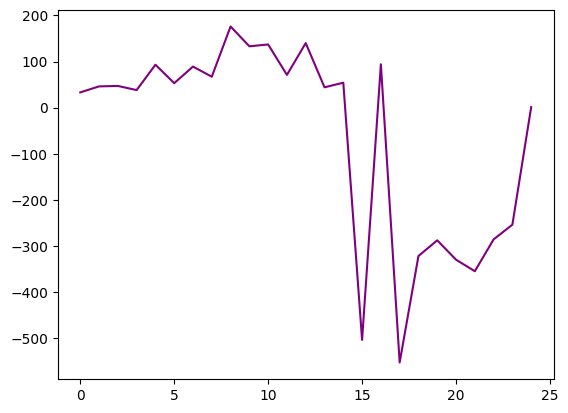

In [4]:
plt.plot(user_dict["White"][0], color="purple")

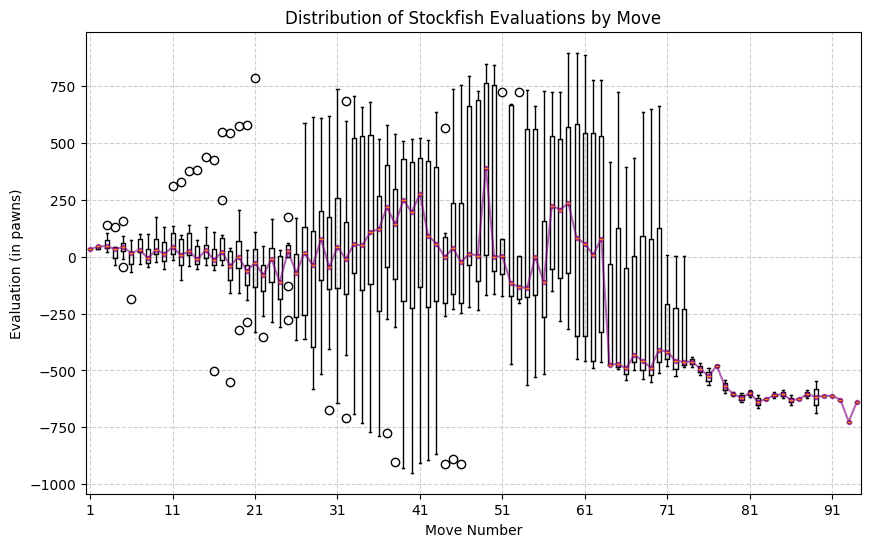

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
games = user_dict["White"]

# Find the longest game (number of moves)
max_moves = max(len(g) for g in games)

# Build a dataframe where each column is a move number
df = pd.DataFrame([g + [None]*(max_moves - len(g)) for g in games])

# Calculate the mean evaluation per move (ignoring NaN)
means = df.median()


# Each column is now all the Stockfish evals for that move across games
plt.figure(figsize=(10, 6))
plt.boxplot([df[i].dropna() for i in df.columns])
plt.plot(range(1, len(means)+1), means, color='purple', marker='.', alpha=0.6, label='Average')

plt.title("Distribution of Stockfish Evaluations by Move")
plt.xticks(range(1, len(df.columns) + 1, 10), range(1, len(df.columns) + 1, 10))
plt.xlabel("Move Number")
plt.ylabel("Evaluation (in pawns)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()